In [82]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [83]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [84]:
base_dir='/kaggle/input/plantvillage-dataset/color'

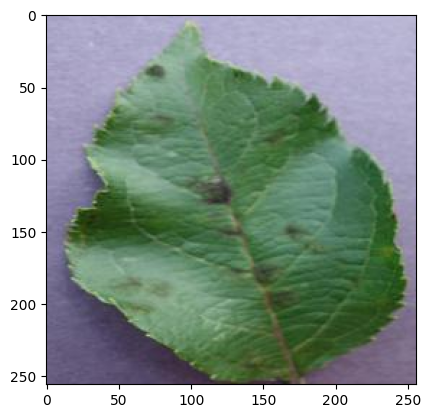

In [85]:
img_path='/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
img=mpimg.imread(img_path)
plt.imshow(img)

In [86]:
print(img.shape)

(256, 256, 3)


In [87]:
print(img)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


In [88]:
img_size = 224
batch_size = 32


In [89]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [90]:
Train_img=data_gen.flow_from_directory(base_dir,target_size=(img_size,img_size),batch_size=batch_size,subset='training',class_mode='categorical')

Found 43456 images belonging to 38 classes.


In [91]:
Test_img=data_gen.flow_from_directory(base_dir,target_size=(img_size,img_size),batch_size=batch_size,subset='validation',class_mode='categorical')

Found 10849 images belonging to 38 classes.


In [97]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(Train_img.num_classes, activation='softmax'))


In [98]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,254,438 (84.89 MB)

 Trainable params: 22,254,438 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [100]:
# Train model
history = model.fit(
    Train_img,
    steps_per_epoch=Train_img.samples // batch_size,
    epochs=5,
    validation_data=Test_img,
    validation_steps=Test_img.samples // batch_size
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 107s 76ms/step - accuracy: 0.5678 - loss: 1.6447 - val_accuracy: 0.8539 - val_loss: 0.4505
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 106s 78ms/step - accuracy: 0.8899 - loss: 0.3434 - val_accuracy: 0.9030 - val_loss: 0.3016
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 103s 76ms/step - accuracy: 0.9418 - loss: 0.1787 - val_accuracy: 0.8897 - val_loss: 0.3643
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 105s 77ms/step - accuracy: 0.9600 - loss: 0.1198 - val_accuracy: 0.8967 - val_loss: 0.3879
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 104s 77ms/step - accuracy: 0.9687 - loss: 0.0931 - val_accuracy: 0.9140 - val_loss: 0.3414


In [101]:
val_loss, val_accuracy = model.evaluate(Test_img, steps=Test_img.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


339/339 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9158 - loss: 0.3424
Validation Accuracy: 91.40%


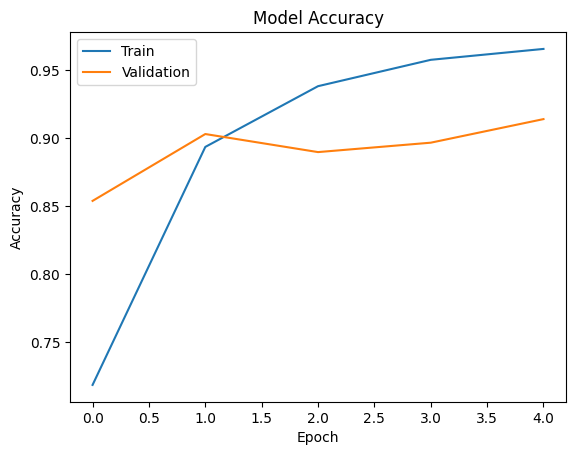

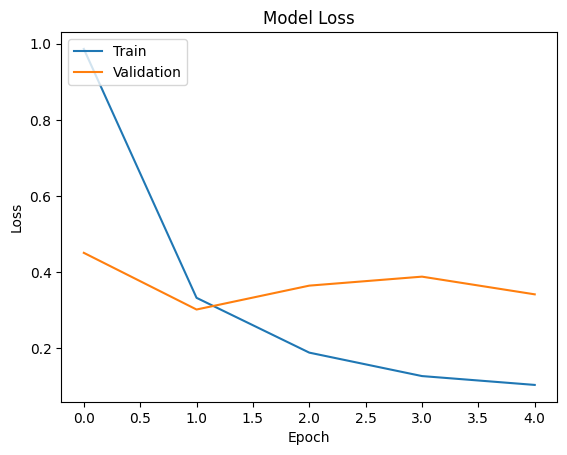

In [102]:
# 📉 Accuracy & Loss Graphs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [103]:
# 🔍 Predict on New Image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [108]:
class_indices = {v: k for k, v in Train_img.class_indices.items()}
json.dump(class_indices, open('/kaggle/working/class_indices.json', 'w'))

test_img_path = '/kaggle/input/testing/test_blueberry_healthy.jpg'
print("Predicted Class:", predict_image_class(model, test_img_path, class_indices))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: Blueberry___healthy


/kaggle/working/plant_disease_prediction_model.h5